# Decission Tree Classifier and Regressor Implementation 

- Dataset used - Iris
- 4 independent features  in data 
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
- 3 output features in target - 0,1,2
    - Iris-Setosa
    - Iris-Versicolour
    - Iris-Virginica
- based on the dataset make predictions on the flower category 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

# split the independent & dependent features

In [7]:
X = pd.DataFrame(iris['data'], columns=['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm'])
y = iris['target']
X

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# train test split

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Apply Decission Tree Ml Algo on the training dataset

- Decission tree algo does not require any standardization or normalization

# Apply Decssion Tree Classifier

In [11]:
from sklearn.tree import DecisionTreeClassifier

#  take in default params
dt_classifier = DecisionTreeClassifier()

# fit the training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

- After we fit the training data, we create the decission tree & visualize the tree

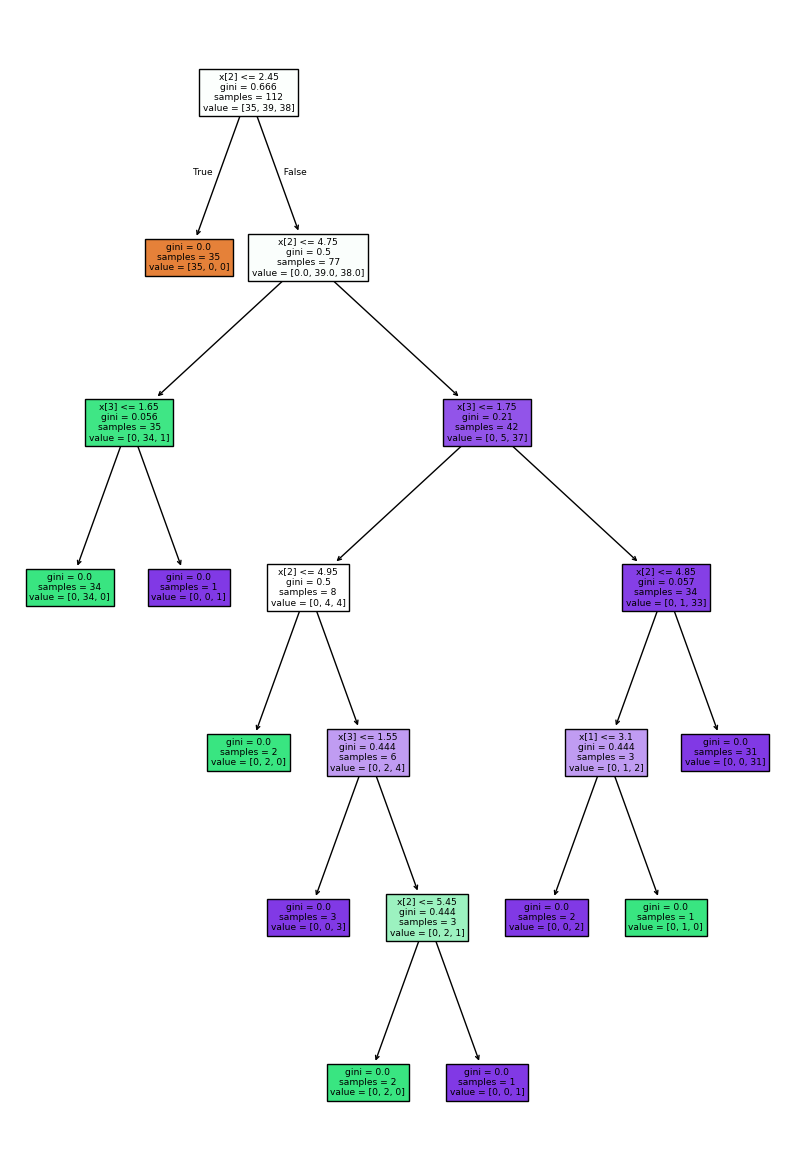

In [13]:
# Visulaize the tree

from sklearn import tree
plt.figure(figsize=(10,15))
tree.plot_tree(dt_classifier, filled=True)
plt.show()

 - to do post -pruning in the descission tree
 because we see post depth 2 we don't have any major splits required the sample size to 1 category is larger compared to other
 this inference can be used to make the prediction itelf .

 - to do post pruning - add the max_depth param
    dt_classifier = DecisionTreeClassifier(max_depth = 2)

- post-pruning is always good for smaller dataset
      because if the dataset is larger ---> create the entire dt & then prune it ----> cost and time complexity increases.


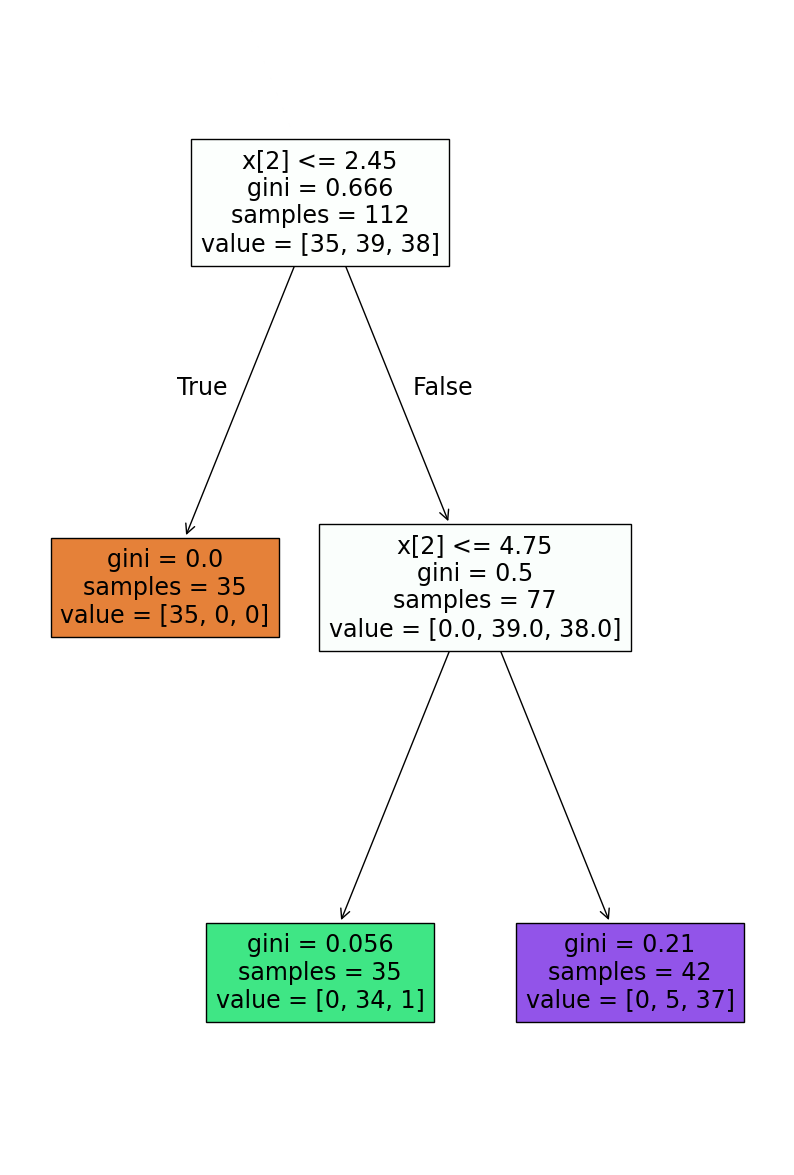

In [14]:
dt_classifier2 = DecisionTreeClassifier(max_depth=2)
dt_classifier2.fit(X_train, y_train)

# Visulaize the tree

from sklearn import tree
plt.figure(figsize=(10,15))
tree.plot_tree(dt_classifier2, filled=True)
plt.show()

## predict on the test data

In [16]:
y_pred = dt_classifier2.predict(X_test)

# Performance , Metrics & Accuracy Calculation

- we can apply various other params in DecissionTreeClassifier fron the list of params
- we can hyperparamter tune it using RandomizedSearchCV. ------> select the best params & apply to our decission tree Model.

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("classification report",classification_report(y_test, y_pred))
print("accuracy score",accuracy_score(y_test, y_pred))
print("confusion matrix",confusion_matrix(y_test, y_pred))

classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

accuracy score 0.9736842105263158
confusion matrix [[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]
